In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import statistics as st

x = []
y = []
with open('../data/data.txt','r') as file:
# with open('../coeff-generator/test_data.txt','r') as file:
    for line in file:
        cord = line.split()[:2]
        tx = float(cord[0])
        ty = float(cord[1])
        x.append(tx)
        y.append(ty)

In [2]:
ncity = len(x)
city_distance = np.zeros((ncity, ncity), dtype=np.float64)
for i in range(0, ncity):
    for j in range(i + 1, ncity):
        city_distance[i][j] = math.sqrt((x[i] - x[j]) ** 2 + (y[i] - y[j]) ** 2)
        city_distance[j][i] = city_distance[i][j]

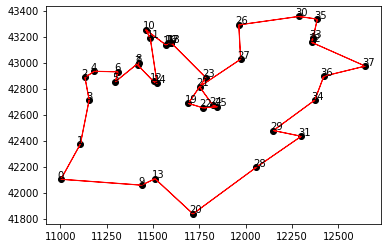

In [3]:
path_list = []
with open('out.txt', 'r') as file:
    for line in file:
        path_list.append(list(map(int, line.split())))

best_route = path_list[-1]
best_route.append(best_route[0])

plt.scatter(x, y, color="black")
for i in range(ncity):
   cur_idx = best_route[i]
   next_idx = best_route[i+1]
   plt.annotate(cur_idx, (x[cur_idx] - 18, y[cur_idx] + 10), size=10)
   plt.arrow(x[cur_idx], y[cur_idx], x[next_idx] - x[cur_idx], y[next_idx] -
            y[cur_idx], head_width=8, width=1, color="r", length_includes_head=True)

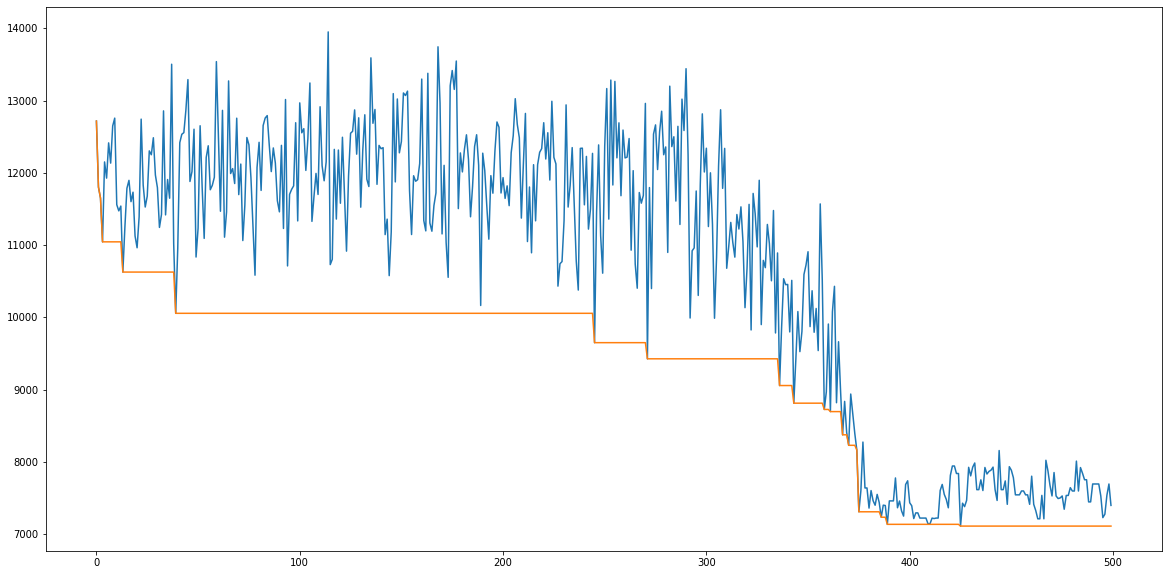

In [4]:
distance_tsp_logs = []
best_distance_tsp_logs = []
with open('log.txt', 'r') as file:
    for line in file:
        best = float(line.split()[0])
        min = float(line.split()[1])
        best_distance_tsp_logs.append(best)
        distance_tsp_logs.append(min)

plt.figure(figsize=(20,10))
plt.plot(distance_tsp_logs)
plt.plot(best_distance_tsp_logs)

In [5]:
rec = []
# with open('../qastp/out.txt','r') as file :
with open('../../SQA-HLS/solution1/csim/build/out.txt','r') as file :
# with open('../qastp-old-v2/out.txt','r') as file :
    for line in file:
        if ('Energy:' in line):
            rec.append(float(line.split()[1]))

np.min(rec)

1.41929

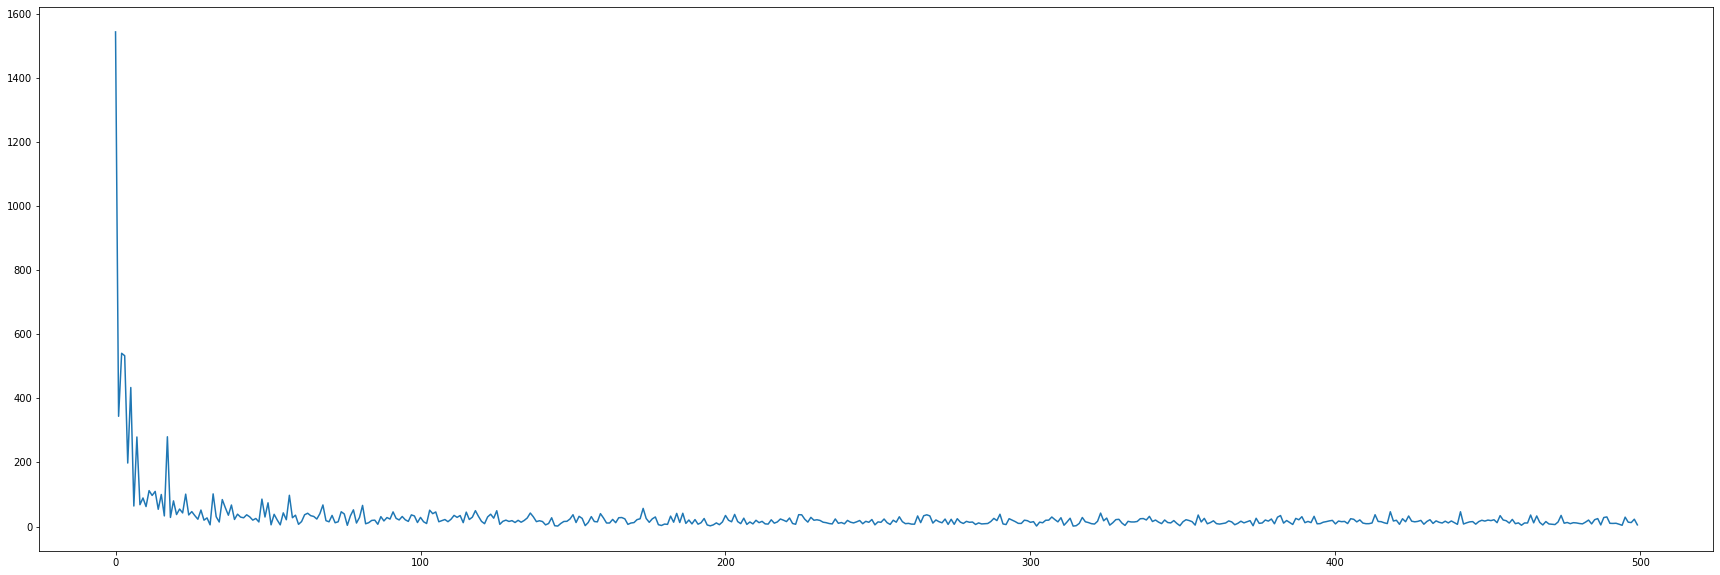

In [6]:
plt.figure(figsize=(30,10))
plt.plot(rec[:])